## Import some prerequirement

In [48]:
import os
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras

## Set hyperparameters

In [49]:
IMG_WIDTH = None
IMG_HEIGHT = None
EPOCHS = None
BATCH_SIZE= None
n_classes = None

## Initialize train and test data

In [50]:
data = np.load('mnist.npz')
[x_train, y_train, x_test, y_test] = data['x_train'], data['y_train'], data['x_test'], data['y_test']

## Show dataset

## Define model

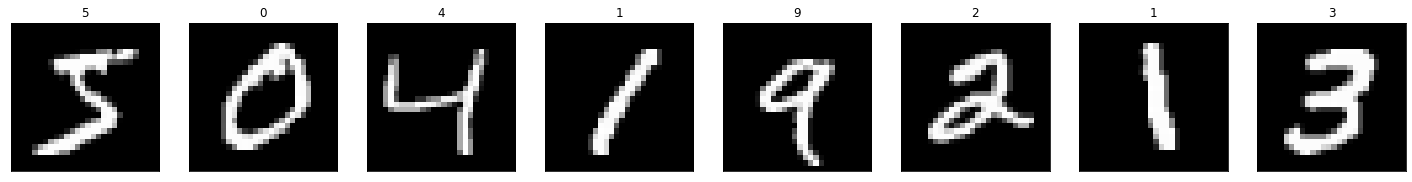

In [51]:
plt.figure(figsize=(25,4))
for i in range(8):
    plt.subplot(1,8,i+1)
    plt.imshow(x_train[i], cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.title(y_train[i])
x_train = x_train.astype(float) / 255.
x_test  = x_test.astype(float) / 255.

In [52]:
def build_model():
    model = keras.Sequential()
    model.add(keras.layers.Input(shape=x_train[0].shape))
    model.add(keras.layers.Flatten())
    model.add(keras.layers.Dense(units=512, activation='relu'))
    model.add(keras.layers.Dense(units=512, activation='relu'))
    model.add(keras.layers.Dense(units=10))

    return model


## Compile and fit model

In [53]:
# Compile model

# compile model


model_adam = build_model()
model_adam.compile(loss='mse', optimizer='adam')
# Fit model
history = model_adam.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    batch_size=100,
                    epochs=20,
                    verbose=0,
                    shuffle=True)
y_pred_adam = model_adam.predict(x_test)
np.set_printoptions(precision=2, linewidth=200)
accuracy_adam = np.average(np.round(y_pred_adam[:, 0]) == y_test) * 100
print('adam accuracy = {} %'.format(accuracy_adam))



model_Adagrad = build_model()
model_Adagrad.compile(loss='mse', optimizer='Adagrad')
# Fit model
history = model_Adagrad.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    batch_size=100,
                    epochs=20,
                    verbose=0,
                    shuffle=True)
y_pred_Adagrad = model_Adagrad.predict(x_test)
np.set_printoptions(precision=2, linewidth=200)
accuracy_Adagrad = np.average(np.round(y_pred_Adagrad[:, 0]) == y_test) * 100
print('Adagrad accuracy = {} %'.format(accuracy_Adagrad))



model_RMSprop = build_model()
model_RMSprop.compile(loss='mse', optimizer='RMSprop')
# Fit model
history = model_RMSprop.fit(x_train, y_train,
                    validation_data=(x_test, y_test),
                    batch_size=100,
                    epochs=20,
                    verbose=0,
                    shuffle=True)
y_pred_RMSprop = model_RMSprop.predict(x_test)
np.set_printoptions(precision=2, linewidth=200)
accuracy_RMSprop = np.average(np.round(y_pred_RMSprop[:, 0]) == y_test) * 100
print('accuracy RMSprop= {} %'.format(accuracy_RMSprop))


adam accuracy = 93.92 %
Adagrad accuracy = 53.71 %
accuracy RMSprop= 93.16 %


## Load and compile best model

In [55]:
from time import time
from tensorflow.keras.callbacks import TensorBoard
model = None
if accuracy_RMSprop<accuracy_adam and accuracy_adam> accuracy_Adagrad:

    model_adam = build_model()
    model_adam.compile(loss='mse', optimizer='adam')
    # Fit model
    tensorboard = TensorBoard(log_dir='logs/{}'.format(time()))

    my_callbacks = [
        tensorboard,
    ]

    history = model_adam.fit(x_train, y_train,
                        validation_data=(x_test, y_test),
                        batch_size=100,
                        epochs=20,
                        verbose=0,
                        shuffle=True,
                        callbacks=my_callbacks)
    y_pred_adam = model_adam.predict(x_test)
    np.set_printoptions(precision=2, linewidth=200)
    accuracy_adam = np.average(np.round(y_pred_adam[:, 0]) == y_test) * 100
    print('adam accuracy = {} %'.format(accuracy_adam))
    model = model_adam
    
elif accuracy_RMSprop>accuracy_Adagrad:
    model_RMSprop = build_model()
    model_RMSprop.compile(loss='mse', optimizer='RMSprop')
    # Fit model
    tensorboard = TensorBoard(log_dir='logs/{}'.format(time()))
    my_callbacks = [
        tensorboard,
    ]
    history = model_RMSprop.fit(x_train, y_train,
                        validation_data=(x_test, y_test),
                        batch_size=100,
                        epochs=20,
                        verbose=0,
                        shuffle=True,
                        callbacks=my_callbacks)
    y_pred_RMSprop = model_RMSprop.predict(x_test)
    np.set_printoptions(precision=2, linewidth=200)
    accuracy_RMSprop = np.average(np.round(y_pred_RMSprop[:, 0]) == y_test) * 100
    print('accuracy RMSprop= {} %'.format(accuracy_RMSprop))
    model = model_RMSprop
   
else:
    model_Adagrad = build_model()
    model_Adagrad.compile(loss='mse', optimizer='Adagrad')
    # Fit model
    tensorboard = TensorBoard(log_dir='logs/{}'.format(time()))
    
    history = model_Adagrad.fit(x_train, y_train,
                        validation_data=(x_test, y_test),
                        batch_size=100,
                        epochs=20,
                        verbose=0,
                        shuffle=True,
                        callbacks=my_callbacks)
    y_pred_Adagrad = model_Adagrad.predict(x_test)
    np.set_printoptions(precision=2, linewidth=200)
    accuracy_Adagrad = np.average(np.round(y_pred_Adagrad[:, 0]) == y_test) * 100
    print('Adagrad accuracy = {} %'.format(accuracy_Adagrad))
    model=model_Adagrad
    

# compile best model


adam accuracy = 94.71000000000001 %


## Evaluate best model

In [56]:
# evaluate best model
%load_ext tensorboard
%tensorboard --logdir logs

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 176218), started 0:33:39 ago. (Use '!kill 176218' to kill it.)

## Get Reports

In [59]:
# get report of metrics
from sklearn.metrics import classification_report, confusion_matrix
# serialize model to JSON
model_json = model.to_json()
with open("./model/model.json", "w") as json_file:
    json_file.write(model_json)

# serialize weights to HDF5
model.save_weights("./model/model.h5")
print("Saved model to disk")

Saved model to disk
